# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv', index_col='date', parse_dates=['date'])
test_df = pd.read_csv('test.csv', index_col='date', parse_dates=['date'])
cli_df = pd.read_csv('cli.csv')
train_df

,row_id,country,store,product,num_sold
date,,,,,
2017-01-01,0,Belgium,KaggleMart,Kaggle Advanced Techniques,663
2017-01-01,1,Belgium,KaggleMart,Kaggle Getting Started,615
2017-01-01,2,Belgium,KaggleMart,Kaggle Recipe Book,480
2017-01-01,3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
2017-01-01,4,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...
2020-12-31,70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
2020-12-31,70124,Spain,KaggleRama,Kaggle Advanced Techniques,215
2020-12-31,70125,Spain,KaggleRama,Kaggle Getting Started,158


In [3]:
cli_df

,yyyy-mm,cli
0,2017-01,96.55057
1,2017-02,96.30569
2,2017-03,96.18154
3,2017-04,96.18688
4,2017-05,96.28305
5,2017-06,96.47530
6,2017-07,96.72138
7,2017-08,96.97509
8,2017-09,97.25387
9,2017-10,97.53589


In [4]:
train_data = train_df.copy()
test_data = test_df.copy()
# test_data.set_index('date')

In [5]:
train_data.drop(columns=['row_id', 'country', 'store', 'product'], inplace=True)
test_data.drop(columns=['row_id', 'country', 'store', 'product'], inplace=True)

In [6]:
train_data

,num_sold
date,
2017-01-01,663
2017-01-01,615
2017-01-01,480
2017-01-01,710
2017-01-01,240
...,...
2020-12-31,614
2020-12-31,215
2020-12-31,158


In [7]:
test_data

""
date
2021-01-01
2021-01-01
2021-01-01
2021-01-01
2021-01-01
...
2021-12-31
2021-12-31
2021-12-31


<AxesSubplot:xlabel='date'>

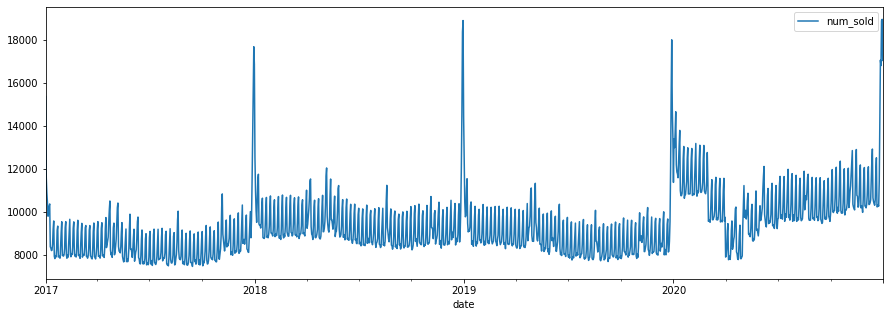

In [8]:
train_data = train_data.groupby(["date"])["num_sold"].sum().reset_index()
test_agg = test_df.groupby(["date"])["row_id"].first().reset_index().drop(columns="row_id")
test_dates = test_agg[["date"]]
train_data.set_index('date', inplace=True)
train_data.plot(figsize=(15, 5))

<AxesSubplot:>

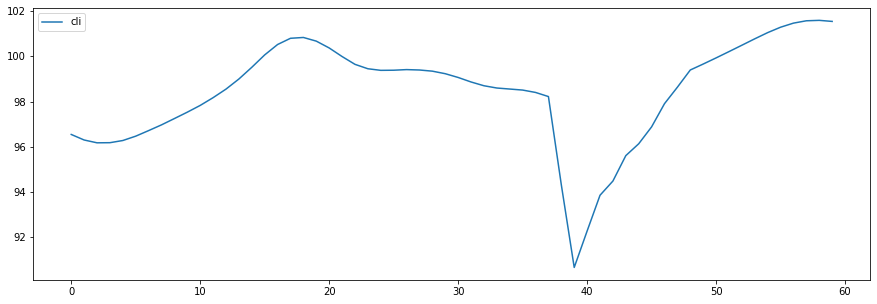

In [9]:
cli_df.plot(figsize=(15, 5))

<AxesSubplot:xlabel='date'>

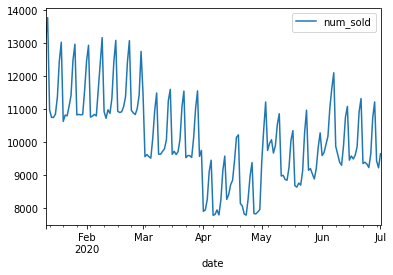

In [10]:
train_data.loc[(train_data.index > '01-10-2020') & (train_data.index <= '07-01-2020')].plot()

In [11]:
train_data.loc[(train_data.index >='2020-01-01') & (train_data.index <'2020-06-01') & (train_data.index !='2020-02-29')]

,num_sold
date,
2020-01-01,11366
2020-01-02,13385
2020-01-03,12981
2020-01-04,13692
2020-01-05,14648
...,...
2020-05-27,9032
2020-05-28,8882
2020-05-29,9202


In [12]:
t = train_data.loc[(train_data.index >='2019-01-01') & (train_data.index <'2019-06-01')]
t.set_index(train_data.loc[(train_data.index >='2020-01-01') & (train_data.index <'2020-06-01') & (train_data.index !='2020-02-29')].index, inplace=True)
t

,num_sold
date,
2020-01-01,12221
2020-01-02,10449
2020-01-03,9768
2020-01-04,9835
2020-01-05,11064
...,...
2020-05-27,8139
2020-05-28,8271
2020-05-29,8025


In [13]:
train_data.update(t)
train_data

,num_sold
date,
2017-01-01,15352.0
2017-01-02,11578.0
2017-01-03,10884.0
2017-01-04,10445.0
2017-01-05,9795.0
...,...
2020-12-27,17042.0
2020-12-28,16789.0
2020-12-29,18876.0


<AxesSubplot:xlabel='date'>

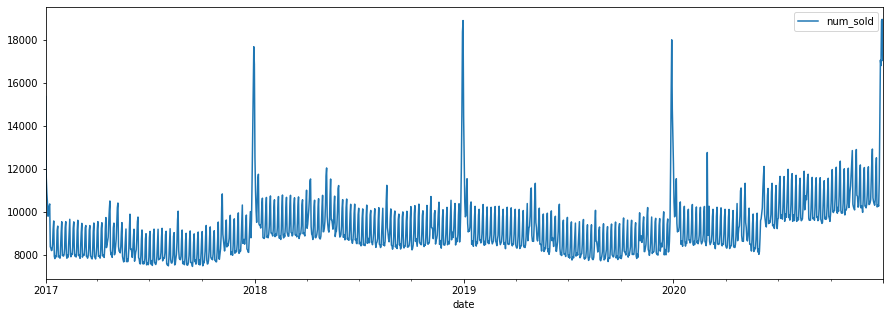

In [14]:
train_data.plot(figsize=(15, 5))

In [15]:
train = train_data.loc[train_data.index < '05-01-2019']
valid_test = train_data.loc[train_data.index >= '05-01-2019']
valid_test

,num_sold
date,
2019-05-01,8659.0
2019-05-02,8627.0
2019-05-03,9321.0
2019-05-04,10572.0
2019-05-05,11325.0
...,...
2020-12-27,17042.0
2020-12-28,16789.0
2020-12-29,18876.0


<AxesSubplot:xlabel='date'>

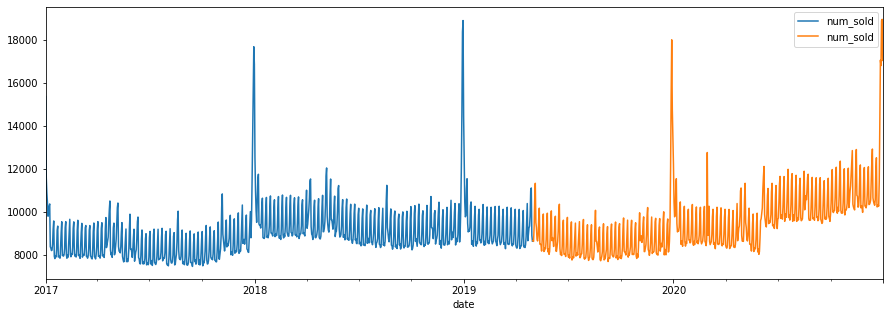

In [16]:
fig = train.plot(figsize=(15, 5))
valid_test.plot(ax=fig)

<AxesSubplot:xlabel='date'>

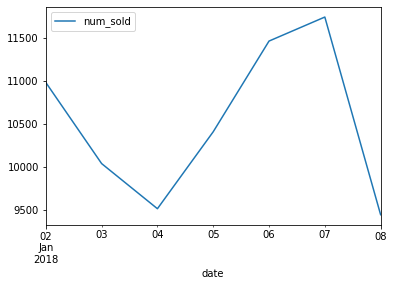

In [17]:
train_data.loc[(train_data.index > '01-01-2018') & (train_data.index <= '01-08-2018')].plot()

<AxesSubplot:xlabel='date'>

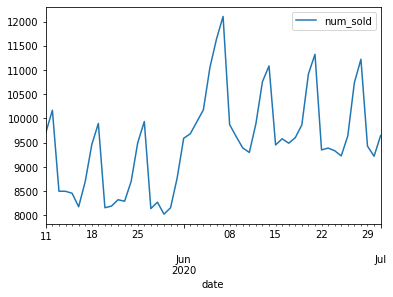

In [18]:
train_data.loc[(train_data.index > '05-10-2020') & (train_data.index <= '07-01-2020')].plot()

In [19]:
def create_feature(df):
    df = df.copy()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['week'] = df.index.isocalendar().week
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['dayofyear'] = df.index.dayofyear
    df["important_dates"] = df["dayofyear"].apply(lambda x: abs(180-x) if x in [1,2,3,4,5,6,7,8,125,126,360,361,362,363,364,365] else 0)
    df = pd.get_dummies(df, columns=['dayofweek', 'important_dates'])
    return df

In [20]:
train = create_feature(train)
valid_test = create_feature(valid_test)
test_data = create_feature(test_data)
train_df = create_feature(train_df)
test_df = create_feature(test_df)

In [21]:
train = train.astype('int')
valid_test = valid_test.astype('int')
test_data = test_data.astype('int')

In [22]:
train["yyyy-mm"] = train.index.strftime('%Y-%m')
valid_test["yyyy-mm"] = valid_test.index.strftime('%Y-%m')
test_data["yyyy-mm"] = test_data.index.strftime('%Y-%m')

In [23]:
train_idx = train.index
valid_test_idx = valid_test.index
test_idx = test_data.index

In [24]:
train = train.merge(cli_df)
valid_test = valid_test.merge(cli_df)
test_data = test_data.merge(cli_df)
train.drop(columns=['yyyy-mm'], inplace=True)
valid_test.drop(columns=['yyyy-mm'], inplace=True)
test_data.drop(columns=['yyyy-mm'], inplace=True)

In [25]:
X_train = train.drop(columns=['num_sold'])
y_train = train['num_sold']
X_valid = valid_test.drop(columns=['num_sold'])
y_valid = valid_test['num_sold']

In [26]:
cols = X_train.columns.tolist()
test_cols = test_data.columns.tolist()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.fit_transform(X_valid)
test_data = sc.fit_transform(test_data)

In [27]:
cols

['year',
 'month',
 'week',
 'day',
 'quarter',
 'dayofyear',
 'dayofweek_0',
 'dayofweek_1',
 'dayofweek_2',
 'dayofweek_3',
 'dayofweek_4',
 'dayofweek_5',
 'dayofweek_6',
 'important_dates_0',
 'important_dates_54',
 'important_dates_55',
 'important_dates_172',
 'important_dates_173',
 'important_dates_174',
 'important_dates_175',
 'important_dates_176',
 'important_dates_177',
 'important_dates_178',
 'important_dates_179',
 'important_dates_180',
 'important_dates_181',
 'important_dates_182',
 'important_dates_183',
 'important_dates_184',
 'important_dates_185',
 'cli']

In [28]:
X_valid

array([[-1.22224284, -0.7234077 , -0.86631603, ..., -0.05730683,
        -0.05730683,  0.97833552],
       [-1.22224284, -0.7234077 , -0.86631603, ..., -0.05730683,
        -0.05730683,  0.97833552],
       [-1.22224284, -0.7234077 , -0.86631603, ..., -0.05730683,
        -0.05730683,  0.97833552],
       ...,
       [ 0.81816802,  1.46937383,  1.6375586 , ..., 17.44992837,
        -0.05730683,  0.69272875],
       [ 0.81816802,  1.46937383,  1.6375586 , ..., -0.05730683,
        17.44992837,  0.69272875],
       [ 0.81816802,  1.46937383,  1.6375586 , ..., -0.05730683,
        -0.05730683,  0.69272875]])

In [29]:
X_valid

array([[-1.22224284, -0.7234077 , -0.86631603, ..., -0.05730683,
        -0.05730683,  0.97833552],
       [-1.22224284, -0.7234077 , -0.86631603, ..., -0.05730683,
        -0.05730683,  0.97833552],
       [-1.22224284, -0.7234077 , -0.86631603, ..., -0.05730683,
        -0.05730683,  0.97833552],
       ...,
       [ 0.81816802,  1.46937383,  1.6375586 , ..., 17.44992837,
        -0.05730683,  0.69272875],
       [ 0.81816802,  1.46937383,  1.6375586 , ..., -0.05730683,
        17.44992837,  0.69272875],
       [ 0.81816802,  1.46937383,  1.6375586 , ..., -0.05730683,
        -0.05730683,  0.69272875]])

In [30]:
X_train = pd.DataFrame(X_train, columns=cols)
X_train
X_valid = pd.DataFrame(X_valid, columns=cols)
X_valid
test_data = pd.DataFrame(test_data, columns=test_cols)
test_data

,year,month,week,day,quarter,dayofyear,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,...,important_dates_177,important_dates_178,important_dates_179,important_dates_180,important_dates_181,important_dates_182,important_dates_183,important_dates_184,important_dates_185,cli
0,0.0,-1.602745,1.754319,-1.673503,-1.351749,-1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,19.078784,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-1.786646
1,0.0,-1.602745,1.754319,-1.673503,-1.351749,-1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,19.078784,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-1.786646
2,0.0,-1.602745,1.754319,-1.673503,-1.351749,-1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,19.078784,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-1.786646
3,0.0,-1.602745,1.754319,-1.673503,-1.351749,-1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,19.078784,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-1.786646
4,0.0,-1.602745,1.754319,-1.673503,-1.351749,-1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,19.078784,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-1.786646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,0.0,1.587648,1.687923,1.737042,1.334577,1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,19.078784,1.040094
17516,0.0,1.587648,1.687923,1.737042,1.334577,1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,19.078784,1.040094
17517,0.0,1.587648,1.687923,1.737042,1.334577,1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,19.078784,1.040094
17518,0.0,1.587648,1.687923,1.737042,1.334577,1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,19.078784,1.040094


In [31]:
X_valid

,year,month,week,day,quarter,dayofyear,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,...,important_dates_177,important_dates_178,important_dates_179,important_dates_180,important_dates_181,important_dates_182,important_dates_183,important_dates_184,important_dates_185,cli
0,-1.222243,-0.723408,-0.866316,-1.675049,-0.724213,-0.884027,-0.407468,-0.407468,2.437864,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,0.978336
1,-1.222243,-0.723408,-0.866316,-1.561722,-0.724213,-0.873791,-0.407468,-0.407468,-0.410195,2.437864,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,0.978336
2,-1.222243,-0.723408,-0.866316,-1.448396,-0.724213,-0.863554,-0.407468,-0.407468,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,0.978336
3,-1.222243,-0.723408,-0.866316,-1.335069,-0.724213,-0.853317,-0.407468,-0.407468,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,0.978336
4,-1.222243,-0.723408,-0.866316,-1.221742,-0.724213,-0.843080,-0.407468,-0.407468,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,0.978336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.818168,1.469374,1.566019,1.271450,1.195501,1.583023,-0.407468,-0.407468,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,17.449928,-0.057307,-0.057307,-0.057307,0.692729
607,0.818168,1.469374,1.637559,1.384777,1.195501,1.593259,2.454178,-0.407468,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,17.449928,-0.057307,-0.057307,0.692729
608,0.818168,1.469374,1.637559,1.498104,1.195501,1.603496,-0.407468,2.454178,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,17.449928,-0.057307,0.692729
609,0.818168,1.469374,1.637559,1.611430,1.195501,1.613733,-0.407468,-0.407468,2.437864,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,17.449928,0.692729


In [32]:
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimaters=1000)
reg.fit(X_train, y_train)

[15:40:27] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimaters" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimaters=1000,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [33]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 611 non-null    float64
 1   month                611 non-null    float64
 2   week                 611 non-null    float64
 3   day                  611 non-null    float64
 4   quarter              611 non-null    float64
 5   dayofyear            611 non-null    float64
 6   dayofweek_0          611 non-null    float64
 7   dayofweek_1          611 non-null    float64
 8   dayofweek_2          611 non-null    float64
 9   dayofweek_3          611 non-null    float64
 10  dayofweek_4          611 non-null    float64
 11  dayofweek_5          611 non-null    float64
 12  dayofweek_6          611 non-null    float64
 13  important_dates_0    611 non-null    float64
 14  important_dates_54   611 non-null    float64
 15  important_dates_55   611 non-null    flo

In [34]:
X_valid

,year,month,week,day,quarter,dayofyear,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,...,important_dates_177,important_dates_178,important_dates_179,important_dates_180,important_dates_181,important_dates_182,important_dates_183,important_dates_184,important_dates_185,cli
0,-1.222243,-0.723408,-0.866316,-1.675049,-0.724213,-0.884027,-0.407468,-0.407468,2.437864,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,0.978336
1,-1.222243,-0.723408,-0.866316,-1.561722,-0.724213,-0.873791,-0.407468,-0.407468,-0.410195,2.437864,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,0.978336
2,-1.222243,-0.723408,-0.866316,-1.448396,-0.724213,-0.863554,-0.407468,-0.407468,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,0.978336
3,-1.222243,-0.723408,-0.866316,-1.335069,-0.724213,-0.853317,-0.407468,-0.407468,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,0.978336
4,-1.222243,-0.723408,-0.866316,-1.221742,-0.724213,-0.843080,-0.407468,-0.407468,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,0.978336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.818168,1.469374,1.566019,1.271450,1.195501,1.583023,-0.407468,-0.407468,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,17.449928,-0.057307,-0.057307,-0.057307,0.692729
607,0.818168,1.469374,1.637559,1.384777,1.195501,1.593259,2.454178,-0.407468,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,17.449928,-0.057307,-0.057307,0.692729
608,0.818168,1.469374,1.637559,1.498104,1.195501,1.603496,-0.407468,2.454178,-0.410195,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,17.449928,-0.057307,0.692729
609,0.818168,1.469374,1.637559,1.611430,1.195501,1.613733,-0.407468,-0.407468,2.437864,-0.410195,...,-0.040489,-0.040489,-0.040489,-0.057307,-0.057307,-0.057307,-0.057307,-0.057307,17.449928,0.692729


In [35]:
test_data

,year,month,week,day,quarter,dayofyear,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,...,important_dates_177,important_dates_178,important_dates_179,important_dates_180,important_dates_181,important_dates_182,important_dates_183,important_dates_184,important_dates_185,cli
0,0.0,-1.602745,1.754319,-1.673503,-1.351749,-1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,19.078784,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-1.786646
1,0.0,-1.602745,1.754319,-1.673503,-1.351749,-1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,19.078784,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-1.786646
2,0.0,-1.602745,1.754319,-1.673503,-1.351749,-1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,19.078784,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-1.786646
3,0.0,-1.602745,1.754319,-1.673503,-1.351749,-1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,19.078784,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-1.786646
4,0.0,-1.602745,1.754319,-1.673503,-1.351749,-1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,19.078784,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-1.786646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,0.0,1.587648,1.687923,1.737042,1.334577,1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,19.078784,1.040094
17516,0.0,1.587648,1.687923,1.737042,1.334577,1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,19.078784,1.040094
17517,0.0,1.587648,1.687923,1.737042,1.334577,1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,19.078784,1.040094
17518,0.0,1.587648,1.687923,1.737042,1.334577,1.727312,-0.407596,-0.407596,-0.407596,-0.407596,...,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,-0.052414,19.078784,1.040094


In [36]:
pred2 = reg.predict(X_train)
pred2 = pd.DataFrame(pred2)
pred2.set_index(train_idx, inplace=True)
pred2
pred1 = reg.predict(X_valid)
pred1 = pd.DataFrame(pred1)
pred1.set_index(valid_test_idx, inplace=True)
pred1
pred = reg.predict(test_data)
pred = pd.DataFrame(pred)
pred.set_index(test_idx, inplace=True)
pred

,0
date,
2021-01-01,11828.575195
2021-01-01,11828.575195
2021-01-01,11828.575195
2021-01-01,11828.575195
2021-01-01,11828.575195
...,...
2021-12-31,11413.368164
2021-12-31,11413.368164
2021-12-31,11413.368164


In [37]:
type(pred)

pandas.core.frame.DataFrame

In [38]:
pred2

,0
date,
2017-01-01,15353.132812
2017-01-02,11572.080078
2017-01-03,10859.639648
2017-01-04,10452.565430
2017-01-05,9781.107422
...,...
2019-04-26,9823.905273
2019-04-27,10904.984375
2019-04-28,11107.139648


<AxesSubplot:xlabel='date'>

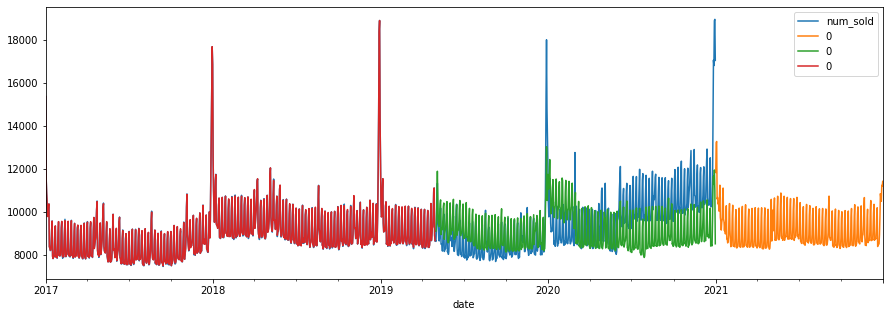

In [39]:
fig = train_data.plot(figsize=(15, 5))
pred.plot(ax=fig)
pred1.plot(ax=fig)
pred2.plot(ax=fig)

In [40]:
test_df['num_sold'] = pred

In [41]:
product_df = train_df.groupby(["date","product"])["num_sold"].sum().reset_index()
product_ratio_df = product_df.pivot(index="date", columns="product", values="num_sold")
product_ratio_df = product_ratio_df.apply(lambda x: x/x.sum(),axis=1)
product_ratio_df = product_ratio_df.stack().rename("ratios").reset_index()
product_ratio_df

,date,product,ratios
0,2017-01-01,Kaggle Advanced Techniques,0.277944
1,2017-01-01,Kaggle Getting Started,0.227462
2,2017-01-01,Kaggle Recipe Book,0.188900
3,2017-01-01,Kaggle for Kids: One Smart Goose,0.305693
4,2017-01-02,Kaggle Advanced Techniques,0.280014
...,...,...,...
5839,2020-12-30,Kaggle for Kids: One Smart Goose,0.300929
5840,2020-12-31,Kaggle Advanced Techniques,0.291703
5841,2020-12-31,Kaggle Getting Started,0.221948
5842,2020-12-31,Kaggle Recipe Book,0.193823


In [42]:
mean_ratios = [0]*1460
for year in train['year'].unique()[:-1]:
    product_ratio_2019 = product_ratio_df.loc[product_ratio_df["date"].dt.year == year].copy()
    product_ratio_2019["mm-dd"] = product_ratio_2019["date"].dt.strftime('%m-%d')
    product_ratio_2019 = product_ratio_2019.drop(columns="date")
    product_ratio_2019 = product_ratio_2019.reset_index()
    mean_ratios+=product_ratio_2019['ratios']
    
product_ratio_test = test_df.copy().reset_index()

product_ratio_2019['mean_ratios'] = mean_ratios/3

product_ratio_test["mm-dd"] = product_ratio_test["date"].dt.strftime('%m-%d')

product_ratio_test = pd.merge(product_ratio_test,product_ratio_2019, how="left", on = ["mm-dd","product"])
product_ratio_test.tail(10)

,date,row_id,country,store,product,year,month,week,day,quarter,...,important_dates_181,important_dates_182,important_dates_183,important_dates_184,important_dates_185,num_sold,mm-dd,index,ratios,mean_ratios
17510,2021-12-31,87638,Poland,KaggleRama,Kaggle Recipe Book,2021,12,52,31,4,...,0,0,0,0,1,11413.368164,12-31,2918,0.191441,0.127564
17511,2021-12-31,87639,Poland,KaggleRama,Kaggle for Kids: One Smart Goose,2021,12,52,31,4,...,0,0,0,0,1,11413.368164,12-31,2919,0.303392,0.202237
17512,2021-12-31,87640,Spain,KaggleMart,Kaggle Advanced Techniques,2021,12,52,31,4,...,0,0,0,0,1,11413.368164,12-31,2916,0.280225,0.187372
17513,2021-12-31,87641,Spain,KaggleMart,Kaggle Getting Started,2021,12,52,31,4,...,0,0,0,0,1,11413.368164,12-31,2917,0.224943,0.149495
17514,2021-12-31,87642,Spain,KaggleMart,Kaggle Recipe Book,2021,12,52,31,4,...,0,0,0,0,1,11413.368164,12-31,2918,0.191441,0.127564
17515,2021-12-31,87643,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,2021,12,52,31,4,...,0,0,0,0,1,11413.368164,12-31,2919,0.303392,0.202237
17516,2021-12-31,87644,Spain,KaggleRama,Kaggle Advanced Techniques,2021,12,52,31,4,...,0,0,0,0,1,11413.368164,12-31,2916,0.280225,0.187372
17517,2021-12-31,87645,Spain,KaggleRama,Kaggle Getting Started,2021,12,52,31,4,...,0,0,0,0,1,11413.368164,12-31,2917,0.224943,0.149495
17518,2021-12-31,87646,Spain,KaggleRama,Kaggle Recipe Book,2021,12,52,31,4,...,0,0,0,0,1,11413.368164,12-31,2918,0.191441,0.127564
17519,2021-12-31,87647,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,2021,12,52,31,4,...,0,0,0,0,1,11413.368164,12-31,2919,0.303392,0.202237


<AxesSubplot:xlabel='date', ylabel='ratios'>

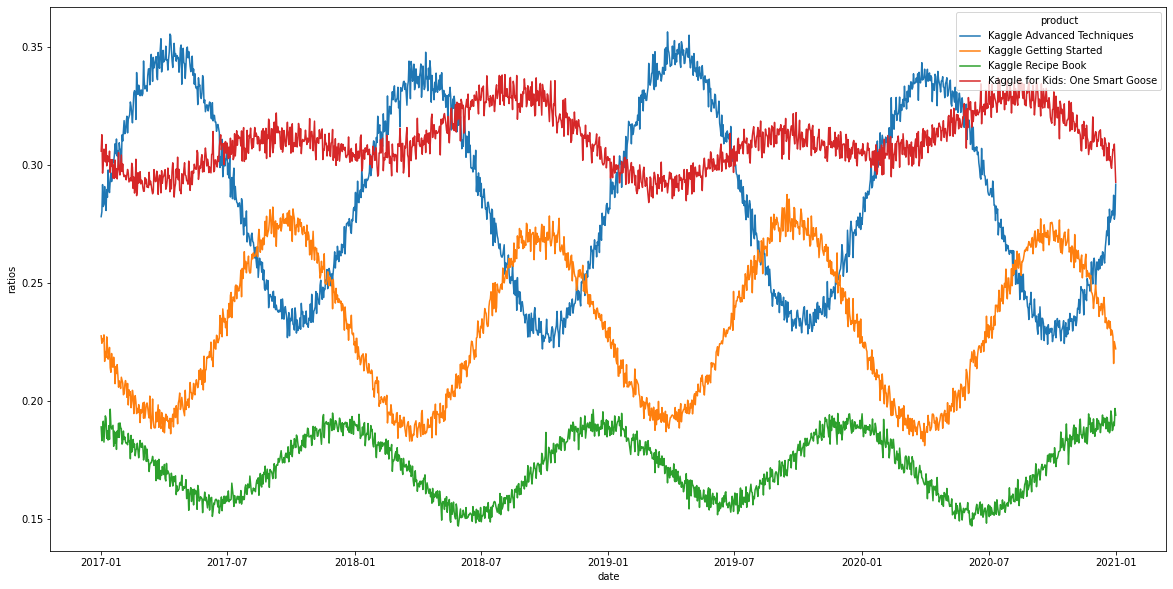

In [43]:
temp_df = pd.concat([product_ratio_df,test_agg]).reset_index(drop=True)
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=temp_df, x="date", y="ratios", hue="product")

In [44]:
def disaggregate_forecast(df,original_data):
    new_df = df.copy()
    
    stores_weights = original_data.groupby("store")["num_sold"].sum()/original_data["num_sold"].sum()
    country_weights = pd.Series(index = df["country"].unique(),data = 1/6)

    for country in country_weights.index:
        new_df.loc[(new_df["country"] == country), "num_sold"] = new_df.loc[(new_df["country"] == country), "num_sold"] *  country_weights[country]
        
    for store in store_weights.index:
        new_df.loc[new_df["store"] == store, "num_sold"] = new_df.loc[new_df["store"] == store, "num_sold"] * store_weights[store]
    
    #apply product weights (which is dependent on date)
    new_df["num_sold"] = new_df["num_sold"] * new_df["ratios"]
    new_df["num_sold"] = new_df["num_sold"].round()
    new_df = new_df.drop(columns=["ratios"])
    
    return new_df

In [45]:
test_df

,row_id,country,store,product,year,month,week,day,quarter,dayofyear,...,important_dates_177,important_dates_178,important_dates_179,important_dates_180,important_dates_181,important_dates_182,important_dates_183,important_dates_184,important_dates_185,num_sold
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,70128,Belgium,KaggleMart,Kaggle Advanced Techniques,2021,1,53,1,1,1,...,0,0,1,0,0,0,0,0,0,11828.575195
2021-01-01,70129,Belgium,KaggleMart,Kaggle Getting Started,2021,1,53,1,1,1,...,0,0,1,0,0,0,0,0,0,11828.575195
2021-01-01,70130,Belgium,KaggleMart,Kaggle Recipe Book,2021,1,53,1,1,1,...,0,0,1,0,0,0,0,0,0,11828.575195
2021-01-01,70131,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2021,1,53,1,1,1,...,0,0,1,0,0,0,0,0,0,11828.575195
2021-01-01,70132,Belgium,KaggleRama,Kaggle Advanced Techniques,2021,1,53,1,1,1,...,0,0,1,0,0,0,0,0,0,11828.575195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,87643,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,2021,12,52,31,4,365,...,0,0,0,0,0,0,0,0,1,11413.368164
2021-12-31,87644,Spain,KaggleRama,Kaggle Advanced Techniques,2021,12,52,31,4,365,...,0,0,0,0,0,0,0,0,1,11413.368164
2021-12-31,87645,Spain,KaggleRama,Kaggle Getting Started,2021,12,52,31,4,365,...,0,0,0,0,0,0,0,0,1,11413.368164


In [46]:
test_df = pd.merge(test_df.reset_index(), test_dates, how="left")
test_df["ratios"] = product_ratio_test["mean_ratios"]
test_df.head()

,date,row_id,country,store,product,year,month,week,day,quarter,...,important_dates_178,important_dates_179,important_dates_180,important_dates_181,important_dates_182,important_dates_183,important_dates_184,important_dates_185,num_sold,ratios
0,2021-01-01,70128,Belgium,KaggleMart,Kaggle Advanced Techniques,2021,1,53,1,1,...,0,1,0,0,0,0,0,0,11828.575195,0.186153
1,2021-01-01,70129,Belgium,KaggleMart,Kaggle Getting Started,2021,1,53,1,1,...,0,1,0,0,0,0,0,0,11828.575195,0.150779
2,2021-01-01,70130,Belgium,KaggleMart,Kaggle Recipe Book,2021,1,53,1,1,...,0,1,0,0,0,0,0,0,11828.575195,0.126430
3,2021-01-01,70131,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2021,1,53,1,1,...,0,1,0,0,0,0,0,0,11828.575195,0.203305
4,2021-01-01,70132,Belgium,KaggleRama,Kaggle Advanced Techniques,2021,1,53,1,1,...,0,1,0,0,0,0,0,0,11828.575195,0.186153


In [47]:
train_df = train_df.reset_index()

In [48]:
store_weights = train_df.groupby("store")["num_sold"].sum()/train["num_sold"].sum()
country_weights = train_df.loc[train_df["date"] < "2020-01-01"].groupby("country")["num_sold"].sum()/train_df.loc[train_df["date"] < "2020-01-01", "num_sold"].sum()

In [49]:
test_df

,date,row_id,country,store,product,year,month,week,day,quarter,...,important_dates_178,important_dates_179,important_dates_180,important_dates_181,important_dates_182,important_dates_183,important_dates_184,important_dates_185,num_sold,ratios
0,2021-01-01,70128,Belgium,KaggleMart,Kaggle Advanced Techniques,2021,1,53,1,1,...,0,1,0,0,0,0,0,0,11828.575195,0.186153
1,2021-01-01,70129,Belgium,KaggleMart,Kaggle Getting Started,2021,1,53,1,1,...,0,1,0,0,0,0,0,0,11828.575195,0.150779
2,2021-01-01,70130,Belgium,KaggleMart,Kaggle Recipe Book,2021,1,53,1,1,...,0,1,0,0,0,0,0,0,11828.575195,0.126430
3,2021-01-01,70131,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2021,1,53,1,1,...,0,1,0,0,0,0,0,0,11828.575195,0.203305
4,2021-01-01,70132,Belgium,KaggleRama,Kaggle Advanced Techniques,2021,1,53,1,1,...,0,1,0,0,0,0,0,0,11828.575195,0.186153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2021-12-31,87643,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,2021,12,52,31,4,...,0,0,0,0,0,0,0,1,11413.368164,0.202237
17516,2021-12-31,87644,Spain,KaggleRama,Kaggle Advanced Techniques,2021,12,52,31,4,...,0,0,0,0,0,0,0,1,11413.368164,0.187372
17517,2021-12-31,87645,Spain,KaggleRama,Kaggle Getting Started,2021,12,52,31,4,...,0,0,0,0,0,0,0,1,11413.368164,0.149495
17518,2021-12-31,87646,Spain,KaggleRama,Kaggle Recipe Book,2021,12,52,31,4,...,0,0,0,0,0,0,0,1,11413.368164,0.127564


In [50]:
final_df = disaggregate_forecast(test_df,train_df)
final_df

,date,row_id,country,store,product,year,month,week,day,quarter,...,important_dates_177,important_dates_178,important_dates_179,important_dates_180,important_dates_181,important_dates_182,important_dates_183,important_dates_184,important_dates_185,num_sold
0,2021-01-01,70128,Belgium,KaggleMart,Kaggle Advanced Techniques,2021,1,53,1,1,...,0,0,1,0,0,0,0,0,0,486.0
1,2021-01-01,70129,Belgium,KaggleMart,Kaggle Getting Started,2021,1,53,1,1,...,0,0,1,0,0,0,0,0,0,394.0
2,2021-01-01,70130,Belgium,KaggleMart,Kaggle Recipe Book,2021,1,53,1,1,...,0,0,1,0,0,0,0,0,0,330.0
3,2021-01-01,70131,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2021,1,53,1,1,...,0,0,1,0,0,0,0,0,0,531.0
4,2021-01-01,70132,Belgium,KaggleRama,Kaggle Advanced Techniques,2021,1,53,1,1,...,0,0,1,0,0,0,0,0,0,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2021-12-31,87643,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,2021,12,52,31,4,...,0,0,0,0,0,0,0,0,1,510.0
17516,2021-12-31,87644,Spain,KaggleRama,Kaggle Advanced Techniques,2021,12,52,31,4,...,0,0,0,0,0,0,0,0,1,164.0
17517,2021-12-31,87645,Spain,KaggleRama,Kaggle Getting Started,2021,12,52,31,4,...,0,0,0,0,0,0,0,0,1,131.0
17518,2021-12-31,87646,Spain,KaggleRama,Kaggle Recipe Book,2021,12,52,31,4,...,0,0,0,0,0,0,0,0,1,111.0


In [52]:
pred1 = np.array(pred1).flatten().tolist()
pred1 = np.array(pred1)

y_valid = y_valid.tolist()
y_valid = np.array(y_valid)

def calculate_smape(actual, predicted) -> float:
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )


calculate_smape(y_valid, pred1)

10.83